In [1]:
import os
import re
import matplotlib as mpl

from med_associates_utils.session import parse_directory, SessionCollection
from med_associates_utils.viz import plot_event_raster

mpl.rcParams['pdf.fonttype'] = 42

In [2]:
base_path = r'C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files'
data_sources = {
    os.path.join(base_path, "MT - Day 1"): {'Genotype': 'MT', 'Day': 'Day1'},
    os.path.join(base_path, "MT - Day 2"): {'Genotype': 'MT', 'Day': 'Day2'},
    os.path.join(base_path, "MT - Day 3"): {'Genotype': 'MT', 'Day': 'Day3'},
    os.path.join(base_path, "MT - Day 4"): {'Genotype': 'MT', 'Day': 'Day4'},

    os.path.join(base_path, "WT - Day 1"): {'Genotype': 'WT', 'Day': 'Day1'},
    os.path.join(base_path, "WT - Day 2"): {'Genotype': 'WT', 'Day': 'Day2'},
    os.path.join(base_path, "WT - Day 3"): {'Genotype': 'WT', 'Day': 'Day3'},
    os.path.join(base_path, "WT - Day 4"): {'Genotype': 'WT', 'Day': 'Day4'},
}

sessions = SessionCollection()
for path, meta in data_sources.items():
    print(f'reading path "{path}"')
    ss = parse_directory(path)
    ss.update_metadata(meta)
    sessions.extend(ss)

def set_animal_id(session):
    animal_id = re.search("EN#\d+", session.metadata['Subject']).group(0)
    session.metadata['Animal'] = animal_id

def rename_arrays_by_program(session):
    if session.metadata['MSN'] in ['CRF', 'CRF-Cue2-rewire']:
        session.rename_array('B', 'rewarded_nosepoke')
        session.rename_array('C', 'magazine_entry')
        session.rename_array('D', 'reward_retrieval_latency')

    elif session.metadata['MSN'] == 'CRFv2023':
        session.rename_array('B', 'nosepoke')
        session.rename_array('C', 'magazine_entry')
        session.rename_array('D', 'reward_retrieval_latency')
        session.rename_array('F', 'rewarded_nosepoke')

sessions.apply(set_animal_id)
sessions.apply(rename_arrays_by_program)
sessions.describe()



reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 1"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 2"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 3"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 4"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 1"


  0%|          | 0/26 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 2"


  0%|          | 0/26 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 3"


  0%|          | 0/26 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 4"


  0%|          | 0/26 [00:00<?, ?it/s]

Number of sessions: 224

Arrays present in data with counts:
(224) "A"
(224) "rewarded_nosepoke"
(224) "magazine_entry"
(224) "reward_retrieval_latency"
(60) "nosepoke"

Scalars present in data with counts:
(224) "R"
(224) "S"




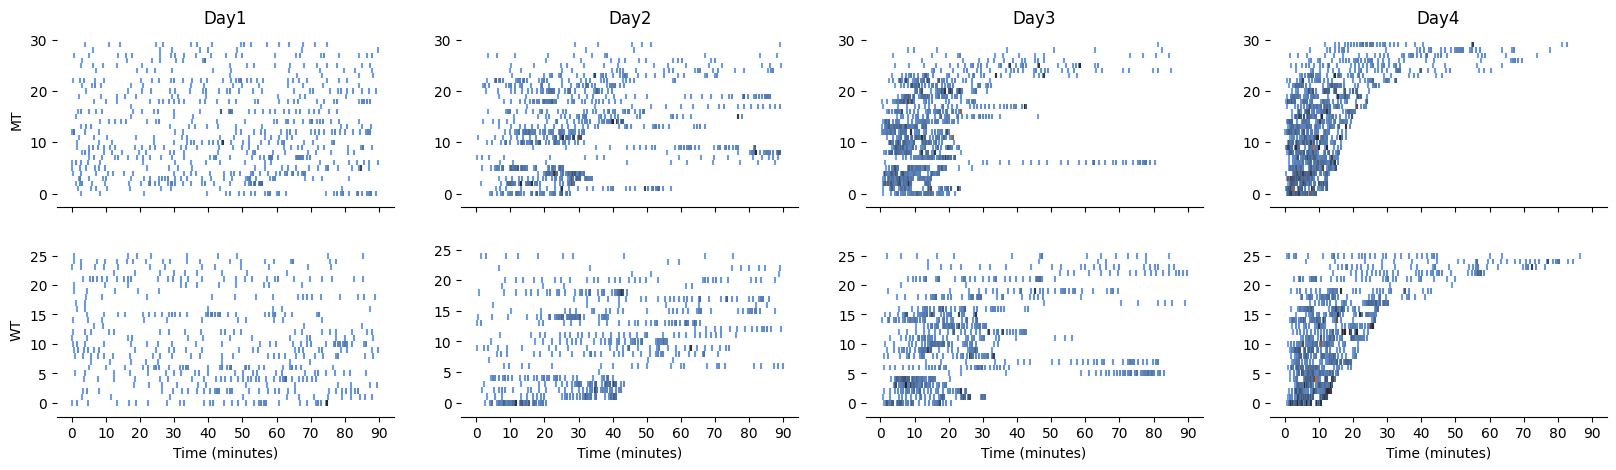

In [3]:
event_df = sessions.to_dataframe(include_meta=['Genotype', 'Day', 'Animal', 'Subject'])
result = plot_event_raster(event_df)

In [4]:
result.sort_order

{'MT': array([22,  8, 26,  4, 19,  5,  7,  1, 23,  9,  0, 17, 24, 21,  6, 27, 18,
        13, 20, 15, 11,  2,  3, 10, 28, 14, 25, 12, 29, 16], dtype=int64),
 'WT': array([18, 17, 22,  6, 12, 19, 23,  9,  8,  2, 14, 25,  4,  5,  3,  1, 24,
        20, 15, 21, 13,  0, 10, 11,  7, 16], dtype=int64)}

In [5]:
result.max_rate

14.018691588785137